# Decision Tree

In [21]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from utils.utils import plot_decision_boundary
import pandas as pd

## Entropy values

In [2]:
def entropy(p):
    return -p * np.log2(p) - (1-p)*np.log2((1-p))

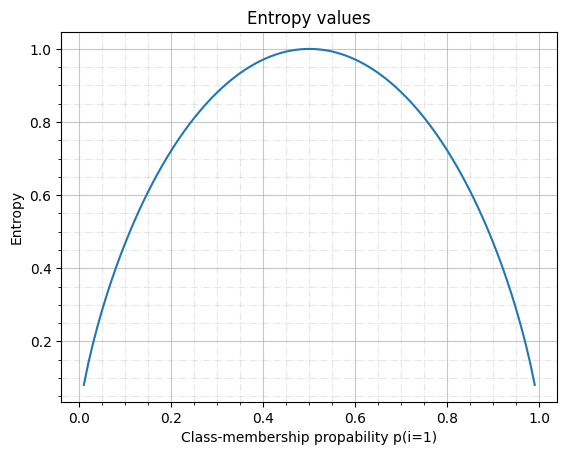

In [3]:
x = np.arange(0.0, 1.0, 0.01) # 100 valores
ent = [entropy(p) if p != 0 else None for p in x]
plt.ylabel('Entropy')
plt.xlabel('Class-membership propability p(i=1)')
plt.title('Entropy values')
plt.minorticks_on()
plt.grid(which='minor', linestyle='-.', alpha=0.3)
plt.grid(which='major', alpha=0.7)
plt.plot(x, ent)
plt.show()

## Comparing Entropy, Gini & Classification Error

In [4]:
def gini(p):
    return p*(1-p) + (1-p)*(1- (1-p))

def error(p):
    return 1 - np.max([p, 1 - p])

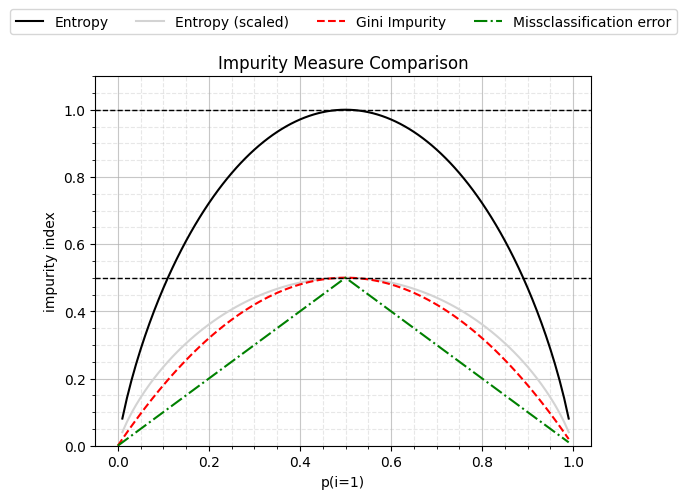

In [5]:
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c in zip(
    [ent, sc_ent, gini(x), err],
    ['Entropy','Entropy (scaled)', 'Gini Impurity', 'Missclassification error'],
    ['-','-','--','-.'],
    ['black','lightgray','red','green','cyan']
):
    line = ax.plot(
        x,
        i,
        label=lab,
        linestyle=ls,
        color=c
    )
ax.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.2),
    ncol=4,
    shadow=False
)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.title('Impurity Measure Comparison')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.minorticks_on()
plt.grid(which='major', alpha=0.7)
plt.grid(which='minor', alpha=0.3, linestyle='--')
plt.ylabel('impurity index')
plt.show()

## Building a Decision Tree

### Load data

In [11]:
# data
# data import
data = load_iris()
X, y = data.data[:, [2, 3]], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

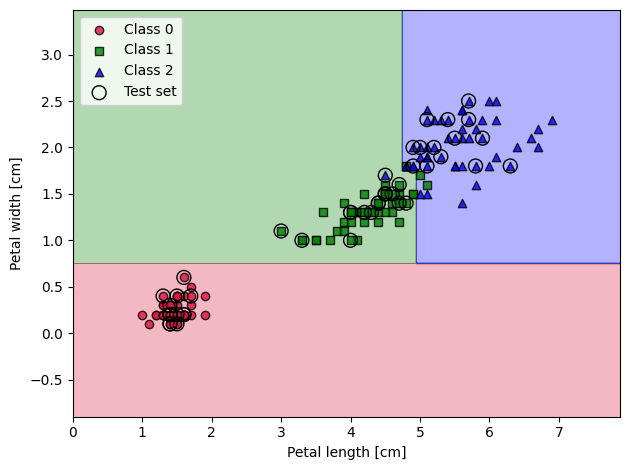

In [12]:
tree_model = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=1
)
tree_model.fit(X_train, y_train)
plot_decision_boundary(
    X_combined,
    y_combined,
    classifier=tree_model,
    test_idx=range(105,150),
    x_label='Petal length [cm]',
    y_label='Petal width [cm]'
)

### Visualize Tree model

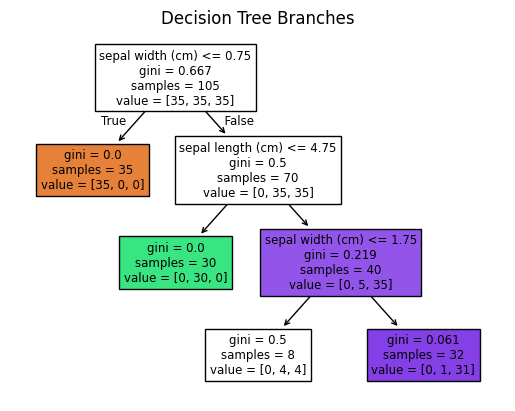

In [43]:
tree.plot_tree(
    tree_model,
    feature_names=data.feature_names,
    filled=True
)
plt.title('Decision Tree Branches');

### Version with `max_depth=3`

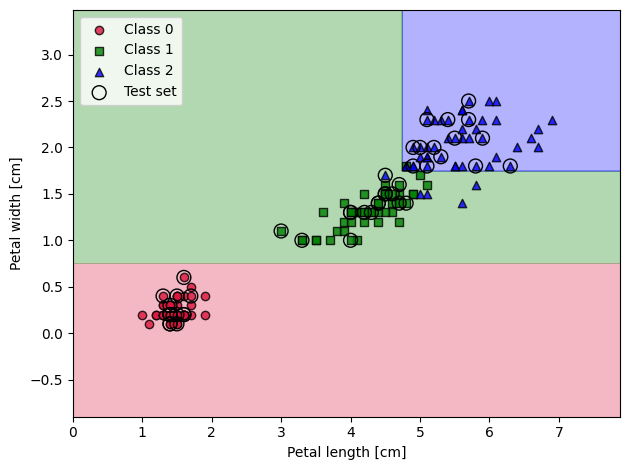

In [17]:
tree_model = tree.DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=1
)
tree_model.fit(X_train, y_train)
plot_decision_boundary(
    X_combined,
    y_combined,
    classifier=tree_model,
    test_idx=range(105,150),
    x_label='Petal length [cm]',
    y_label='Petal width [cm]'
)

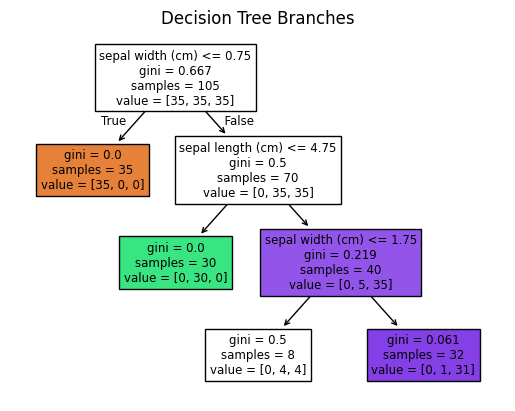

In [42]:
tree.plot_tree(
    tree_model,
    feature_names=data.feature_names,
    filled=True
)
plt.title('Decision Tree Branches');

## Combining multiple Decision Trees via Random Forests

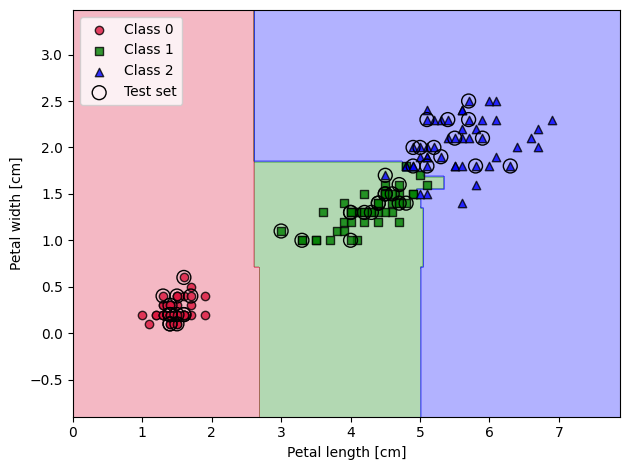

In [38]:
forests = RandomForestClassifier(
    n_estimators=25, # Number of decision trees
    random_state=1, 
    n_jobs=-1 # all possible cores
)

forests.fit(X_train, y_train)
plot_decision_boundary(
    X_combined,
    y_combined,
    forests,
    test_idx=range(105,150),
    x_label='Petal length [cm]',
    y_label='Petal width [cm]'
)

In [36]:
pd.DataFrame(
    data= forests.feature_importances_.reshape(1,-1),
    columns=data.feature_names[2:],
    index=['Importance']
)

,petal length (cm),petal width (cm)
Importance,0.521401,0.478599
